In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, intersect, is.unsorted,
    lapply, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rep.int, rownames,
    sapply, setdiff, sort, table, tapply, union, unique, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading r

In [2]:
?DESeq

In [47]:
a=read.csv("gene_count_matrix.csv", row.names="gene_id")
# a=read.csv("gene_count_matrix.csv", row.names=NULL,fill=T)


In [48]:
a

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6
ENSMUSG00000028185,0,0,0,0,0,0
ENSMUSG00000028186,0,0,0,3,1,0
MSTRG.10382,0,0,0,0,0,0
ENSMUSG00000100525,0,0,0,0,0,0
MSTRG.5811,0,2,2,0,2,16
ENSMUSG00000083764,0,0,1,0,0,0
MSTRG.14206,189,90,1065,236,1100,395
ENSMUSG00000095423,0,0,0,0,0,0
MSTRG.44224,0,2,11,6,11,0
ENSMUSG00000038765,0,0,0,0,0,5


In [49]:
countData <- as.matrix(a)
colData <- read.csv("../sample_description.txt", sep="\t", row.names=1)

In [51]:
colData

,compare
Sample_1,Treated
Sample_2,Treated
Sample_3,Treated
Sample_4,Control
Sample_5,Control
Sample_6,Control


In [34]:
all(rownames(colData) %in% colnames(countData))

[1] TRUE

In [35]:
countData <- countData[, rownames(colData)]

In [36]:
all(rownames(colData) == colnames(countData))

[1] TRUE

In [37]:
dds <- DESeqDataSetFromMatrix(countData = countData, 
        colData = colData, design = ~ compare)

In [38]:
dds <- DESeq(dds)
res <- results(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [39]:
result = data.frame(name=a[,1],baseMean =res$baseMean,log2FoldChange=res$log2FoldChange,lfcSE = res$lfcSE,stat = res$stat,pvalue=res$pvalue,padj=res$padj)

In [40]:
write.csv(result,"DESeq_gene.csv")
# write.csv(result,"DESeq_known_gene.csv")

In [41]:
(resOrdered <- res[order(res$padj), ])

log2 fold change (MAP): compare Treated vs Control 
Wald test p-value: compare Treated vs Control 
DataFrame with 70025 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat       pvalue         padj
      <numeric>      <numeric> <numeric> <numeric>    <numeric>    <numeric>
1      80.94004      -8.070622  1.420201 -5.682733 1.325589e-08 0.0002508809
2      53.13682       7.835212  1.427821  5.487532 4.075882e-08 0.0003857007
3      28.90036      -7.091342  1.444689 -4.908561 9.174723e-07 0.0057880270
4      48.88983       7.260342  1.506958  4.817880 1.450914e-06 0.0068650011
5     347.84832      -7.403925  1.594471 -4.643499 3.425573e-06 0.0108053991
...         ...            ...       ...       ...          ...          ...
70021  0.000000             NA        NA        NA           NA           NA
70022  1.042769       2.026048    1.7889  1.132567    0.2573963           NA
70023  0.000000             NA        NA        NA           NA           NA
70024  0.00000

In [42]:
library("edgeR")

Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:DESeq2’:

    plotMA

The following object is masked from ‘package:BiocGenerics’:

    plotMA



In [54]:
load("Counts.RData")


In [56]:
# https://bioinformatics-core-shared-training.github.io/cruk-bioinf-sschool/Day3/rnaSeq_DE.pdf
Counts <- tmp$counts
colnames(Counts) <- c("16N", "16T", "18N", "18T", "19N", "19T")
dim(Counts)


[1] 25702     6

In [58]:
# countData <- as.matrix(a)
# colData <- read.csv("../sample_description.txt", sep="\t", row.names=1)
dim(countData)

[1] 70025     6

In [59]:
colnames(countData)

[1] "Sample_1" "Sample_2" "Sample_3" "Sample_4" "Sample_5" "Sample_6"

In [98]:
dgList <- DGEList(counts=countData, genes=rownames(countData),group=factor(colData$compare))


ERROR: Error in exprs(dgList): could not find function "exprs"


In [100]:
dgList$samples


,group,lib.size,norm.factors
Sample_1,Treated,8197734,1
Sample_2,Treated,11656453,1
Sample_3,Treated,17771027,1
Sample_4,Control,7738874,1
Sample_5,Control,25544465,1
Sample_6,Control,13688871,1


In [65]:
head(dgList$genes) 

genes
ENSMUSG00000028185
ENSMUSG00000028186
MSTRG.10382
ENSMUSG00000100525
MSTRG.5811
ENSMUSG00000083764


In [101]:
countsPerMillion <- cpm(dgList)
summary(countsPerMillion)


    Sample_1           Sample_2            Sample_3            Sample_4        
 Min.   :    0.00   Min.   :    0.000   Min.   :    0.000   Min.   :    0.000  
 1st Qu.:    0.00   1st Qu.:    0.000   1st Qu.:    0.000   1st Qu.:    0.000  
 Median :    0.00   Median :    0.172   Median :    0.056   Median :    0.000  
 Mean   :   14.28   Mean   :   14.281   Mean   :   14.281   Mean   :   14.281  
 3rd Qu.:    0.00   3rd Qu.:    1.630   3rd Qu.:    1.069   3rd Qu.:    0.905  
 Max.   :26284.95   Max.   :12866.950   Max.   :14316.730   Max.   :27384.216  
    Sample_5            Sample_6        
 Min.   :    0.000   Min.   :    0.000  
 1st Qu.:    0.000   1st Qu.:    0.000  
 Median :    0.117   Median :    0.584  
 Mean   :   14.281   Mean   :   14.281  
 3rd Qu.:    1.292   3rd Qu.:    4.310  
 Max.   :22762.270   Max.   :12525.503  

In [102]:
countCheck <- countsPerMillion > 1
head(countCheck)


,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6
ENSMUSG00000028185,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSMUSG00000028186,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MSTRG.10382,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSMUSG00000100525,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MSTRG.5811,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ENSMUSG00000083764,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [103]:
keep <- which(rowSums(countCheck) >= 2)
dgList <- dgList[keep,]
summary(cpm(dgList)) 

    Sample_1           Sample_2            Sample_3            Sample_4        
 Min.   :    0.00   Min.   :    0.000   Min.   :    0.000   Min.   :    0.000  
 1st Qu.:    0.00   1st Qu.:    1.544   1st Qu.:    1.013   1st Qu.:    0.905  
 Median :    1.22   Median :    7.378   Median :    6.527   Median :    5.427  
 Mean   :   43.33   Mean   :   43.159   Mean   :   43.162   Mean   :   43.325  
 3rd Qu.:   24.15   3rd Qu.:   32.772   3rd Qu.:   33.200   3rd Qu.:   27.911  
 Max.   :26284.95   Max.   :12866.950   Max.   :14316.730   Max.   :27384.216  
    Sample_5            Sample_6        
 Min.   :    0.000   Min.   :    0.000  
 1st Qu.:    1.292   1st Qu.:    3.068  
 Median :    5.735   Median :   11.031  
 Mean   :   43.201   Mean   :   42.048  
 3rd Qu.:   28.979   3rd Qu.:   33.823  
 Max.   :22762.270   Max.   :12525.503  

In [104]:
dgList <- calcNormFactors(dgList, method="TMM")

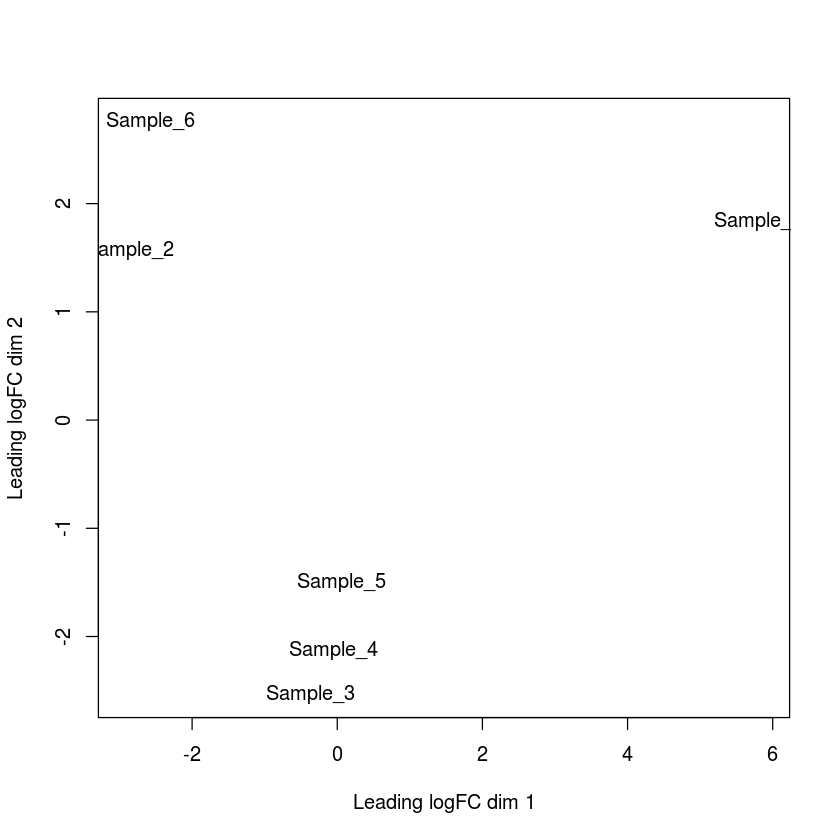

In [105]:
plotMDS(dgList)


In [107]:

designMat <- model.matrix(~0 + dgList$samples$group)
designMat


,dgList$samples$groupControl,dgList$samples$groupTreated
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0


In [111]:
dgList <- estimateGLMCommonDisp(dgList, design=designMat)
dgList <- estimateGLMTrendedDisp(dgList, design=designMat, method="power")
dgList <- estimateGLMTagwiseDisp(dgList, design=designMat)


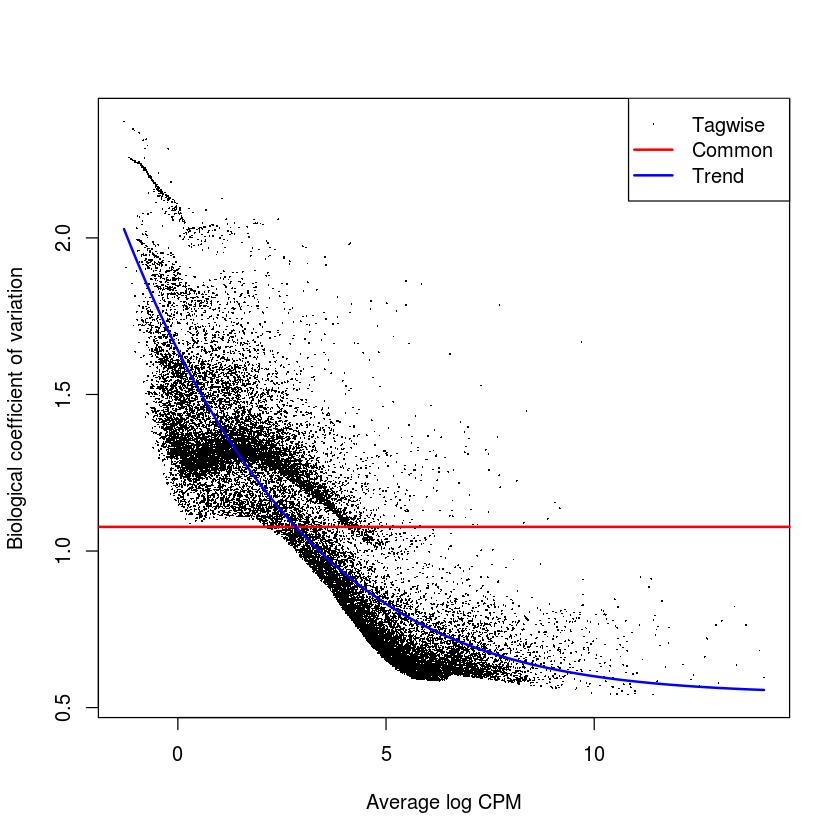

In [112]:
plotBCV(dgList)


In [113]:
fit <- glmFit(dgList, designMat)
lrt <- glmLRT(fit,coef=2)
topTags(lrt)

,genes,logFC,logCPM,LR,PValue,FDR
50234,MSTRG.40098,-14.15256,6.170001,153.3791,3.165429e-35,1.452182e-31
18408,MSTRG.39638,-14.51399,5.658076,153.3026,3.289621e-35,1.452182e-31
47043,MSTRG.30188,-14.22323,5.792121,151.9876,6.375875e-35,1.452182e-31
51593,MSTRG.4347,-26.77744,2.606300,151.8745,6.749167e-35,1.452182e-31
55776,MSTRG.27046,-14.91481,5.827951,151.8677,6.772514e-35,1.452182e-31
23318,MSTRG.13543,-14.22976,5.838318,151.3591,8.747750e-35,1.452182e-31
35540,MSTRG.29683,-14.24198,5.800628,151.3142,8.947655e-35,1.452182e-31
43631,MSTRG.29383,-14.48705,5.613185,151.1034,9.949412e-35,1.452182e-31
63894,MSTRG.18808,-14.40958,5.707601,151.0072,1.044283e-34,1.452182e-31
28113,MSTRG.23543,-14.07124,5.819116,150.9491,1.075263e-34,1.452182e-31


In [115]:
   colnames(designMat) = c("control","treated")

In [116]:
    fit.edgeR <- glmFit(dgList, designMat)
    p.threshold = 0.01
    # Differential expression
    contrasts.edgeR <- makeContrasts(control - treated, levels=designMat)
    lrt.edgeR <- glmLRT(fit.edgeR, contrast=contrasts.edgeR)
# https://github.com/mistrm82/msu_ngs2015/issues/3


In [126]:
topTags(lrt.edgeR,n=70000)

,genes,logFC,logCPM,LR,PValue,FDR
43583,MSTRG.21053,12.772364,4.92990493,27.551483,1.529681e-07,0.003518877
51593,MSTRG.4347,10.355201,2.60630009,21.610030,3.341000e-06,0.038428186
33998,MSTRG.9954,-9.987914,2.07204539,19.428722,1.044247e-05,0.080072882
62172,MSTRG.18524,-9.696613,1.90734732,16.412103,5.095880e-05,0.282164249
67228,MSTRG.27117,9.029895,1.27617311,16.061151,6.132939e-05,0.282164249
65041,MSTRG.20625,8.680317,0.99143602,15.199550,9.672647e-05,0.370849276
14773,MSTRG.9706,8.608286,0.99768211,14.589617,1.336489e-04,0.426797232
46909,MSTRG.3379,-6.018857,7.19782874,14.325137,1.537975e-04,0.426797232
52599,MSTRG.45257,8.615496,1.00506693,14.170379,1.669786e-04,0.426797232
22782,MSTRG.12660,10.053943,2.24986279,13.858974,1.970534e-04,0.453301715


In [ ]:
write.csv(topTags(lrt.edgeR,n=70000),"EdgeR_result.csv")

In [128]:
library( limma )

In [129]:
load("Apoa1.RData")



Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'Apoa1.RData', probable reason 'No such file or directory'”

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [135]:
load( 'bottomly_eset.RData' )

In [179]:
    design.mat <<- model.matrix(~ pData(bottomly.2reps)$strain)
    colnames(design.mat) = levels(pData(bottomly.2reps)$strain)

In [180]:
design.mat

,C57BL/6J,DBA/2J
1,1,0
2,1,0
3,1,1
4,1,1


In [182]:
dgList <- DGEList(counts=countData, genes=rownames(countData),group=factor(colData$compare))


In [187]:
nf = calcNormFactors(dgList$counts)

In [181]:
designMat <- model.matrix(~dgList$samples$group)
# colnames(designMat) = c("control","treated")
designMat


,(Intercept),dgList$samples$groupTreated
1,1,1
2,1,1
3,1,1
4,1,0
5,1,0
6,1,0


In [188]:
v <<- voom(dgList$counts, designMat,normalize.method="quantile",lib.size=colSums(dgList$counts)*nf)

In [185]:
?calcNormFactors

In [169]:
design <- model.matrix(~ pData(bottomly.eset)$strain)
design

,(Intercept),pData(bottomly.eset)$strainDBA/2J
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
10,1,0


In [176]:
pData(bottomly.eset)$strain

[1] C57BL/6J C57BL/6J C57BL/6J C57BL/6J C57BL/6J C57BL/6J C57BL/6J C57BL/6J
 [9] C57BL/6J C57BL/6J DBA/2J   DBA/2J   DBA/2J   DBA/2J   DBA/2J   DBA/2J  
[17] DBA/2J   DBA/2J   DBA/2J   DBA/2J   DBA/2J  
Levels: C57BL/6J DBA/2J

In [189]:
    fit.voom <- lmFit(v, designMat)
    fit.voom <- eBayes(fit.voom)

In [190]:
topTable(fit.voom, coef=2,  adjust="BH",n=70000 )

,logFC,AveExpr,t,P.Value,adj.P.Val,B
MSTRG.9706,-5.493248,-1.969716,-40.59428,8.224607e-07,4.799401e-03,3.286363
MSTRG.25729,-2.911561,-3.228667,-71.40177,6.959496e-08,6.961981e-04,3.158751
MSTRG.45614,-4.573430,-2.402042,-168.95311,1.603487e-09,5.682623e-05,3.153370
MSTRG.23191,-3.298966,-3.036884,-168.48640,1.623027e-09,5.682623e-05,3.115338
MSTRG.24486,-3.255637,-3.060825,-101.47428,1.494345e-08,3.488050e-04,3.102140
MSTRG.2339,-3.187626,-3.098961,-75.04519,5.597460e-08,6.961981e-04,3.089999
MSTRG.48482,-3.266714,-3.054596,-83.45860,3.515744e-08,6.154749e-04,3.081466
MSTRG.30908,-3.344610,-3.011736,-72.61970,6.462984e-08,6.961981e-04,3.046131
MSTRG.8740,-3.224773,-3.078817,-59.16041,1.584705e-07,1.260536e-03,3.038572
MSTRG.34140,-3.307437,-3.031879,-58.86233,1.620111e-07,1.260536e-03,3.017116


In [191]:
write.csv(topTable(fit.voom, coef=2,  adjust="BH",n=70000 ),"voom-limma_result.csv")